Taking instructions from the example found on http://darribas.org/gds15/labs/Lab_08.html, re: http://darribas.org/gds_scipy16/ipynb_md/07_spatial_clustering.html.

First I'll start by reading in the data. I think I'll just look at Chicago to begin with:

In [1]:
# importing recommended libraries

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale

sns.set(style="whitegrid")


/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [10]:
chi_inc_geojson = '/Users/fionaedwardson/Documents/GitHub/GISIII_Final_Project/city_income_data/inc_data_geojson/chi/chi_inc.geojson'

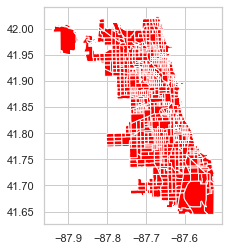

In [12]:
chi_inc = gpd.read_file(chi_inc_geojson)
chi_inc.plot(color='red')

Nice! The CRS looks good too.

Now, let's follow the recommendation of the lab and plot the data as a univariate map.

First I'll look at the data...

In [13]:
print(chi_inc)

     med_earn city_name                                           geometry
0     32321.0       chi  POLYGON ((-87.62433 41.74365, -87.62417 41.736...
1     34671.0       chi  POLYGON ((-87.59062 41.72952, -87.58871 41.726...
2     54606.0       chi  POLYGON ((-87.64060 41.95364, -87.64074 41.953...
3     62745.0       chi  POLYGON ((-87.64180 41.93498, -87.64139 41.934...
4     25571.0       chi  POLYGON ((-87.72286 41.78230, -87.72276 41.778...
..        ...       ...                                                ...
865   31359.0       chi  POLYGON ((-87.67790 41.74288, -87.67725 41.741...
866   50885.0       chi  POLYGON ((-87.80122 41.78476, -87.80122 41.784...
867   35464.0       chi  MULTIPOLYGON (((-87.68070 41.67726, -87.68070 ...
868   54734.0       chi  POLYGON ((-87.78201 41.79967, -87.78203 41.799...
869   43214.0       chi  POLYGON ((-87.77823 41.96853, -87.77283 41.968...

[870 rows x 3 columns]


Working off of a tutorial from here: https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630.

In [16]:
# pip install -U descartes

Note: you may need to restart the kernel to use updated packages.


In [17]:
# viewing the data the proper way

chi_inc.head()

,med_earn,city_name,geometry
0,32321.0,chi,"POLYGON ((-87.62433 41.74365, -87.62417 41.736..."
1,34671.0,chi,"POLYGON ((-87.59062 41.72952, -87.58871 41.726..."
2,54606.0,chi,"POLYGON ((-87.64060 41.95364, -87.64074 41.953..."
3,62745.0,chi,"POLYGON ((-87.64180 41.93498, -87.64139 41.934..."
4,25571.0,chi,"POLYGON ((-87.72286 41.78230, -87.72276 41.778..."


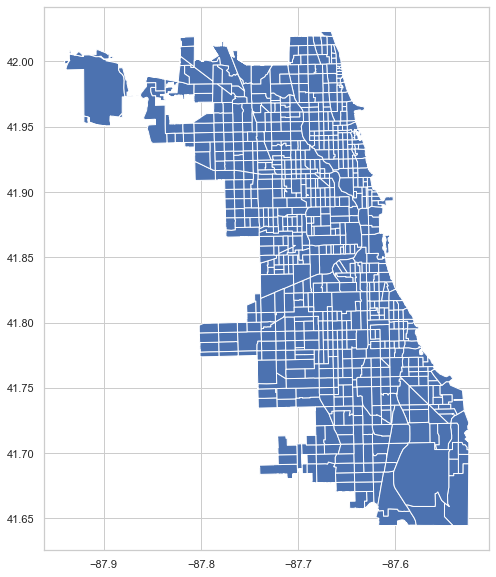

In [20]:
plt.rcParams['figure.figsize'] = [30, 10] #height, width
chi_inc.plot()

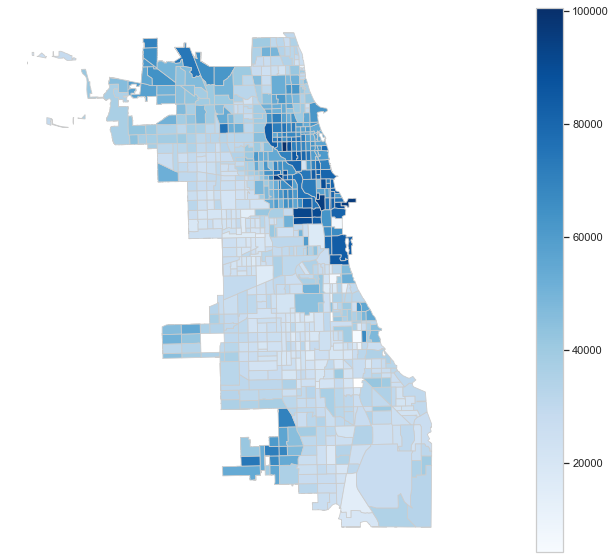

In [23]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

ax.axis("off")

chi_inc.plot(column='med_earn', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)



In [25]:
type(chi_inc)

geopandas.geodataframe.GeoDataFrame

In [27]:
chi_medearn = chi_inc['med_earn']

print(chi_medearn, type(chi_medearn))

0      32321.0
1      34671.0
2      54606.0
3      62745.0
4      25571.0
        ...   
865    31359.0
866    50885.0
867    35464.0
868    54734.0
869    43214.0
Name: med_earn, Length: 870, dtype: float64 <class 'pandas.core.series.Series'>


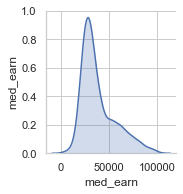

In [28]:
_ = sns.pairplot(chi_inc, kind='reg', diag_kind='kde')

Looking into the documentation https://seaborn.pydata.org/generated/seaborn.pairplot.html, as there's only one variable under consideration, the result is just a univariate plot. Let's move on to the actual clustering!

## Kmeans clustering

Since I initially chose four categories to fit the data to, it makes sense to choose the same number here. The values I chose -- such as "can afford housing" -- have a certain social meaning that the clustering algorithm will not consider. It'll be interesting to see what it determines to be the clusters.

In [35]:
chi_kmeans4 = cluster.KMeans(n_clusters=4)

# this initializes kmeans

As we're only fitting the data, and not trying to use our data to estimate a function, we can just do the following:

In [39]:
print(chi_inc['med_earn'])

0      32321.0
1      34671.0
2      54606.0
3      62745.0
4      25571.0
        ...   
865    31359.0
866    50885.0
867    35464.0
868    54734.0
869    43214.0
Name: med_earn, Length: 870, dtype: float64


In [50]:
np.shape(chi_medearn)
chimed = np.array(chi_medearn)
chimed = chimed.reshape(-1, 1)
np.shape(chimed)

(870, 1)

In [51]:
chik4 = chi_kmeans4.fit(chi_medearn)

ValueError: Expected 2D array, got 1D array instead:
array=[ 32321.  34671.  54606.  62745.  25571.  37500.  59500.  70290.  59938.
  22460.  21121.  34819.  23182.  39750.  17379.  21974.  70068.  24200.
  50375.  41051.  61556.  37250.  26799.  30341.  23294.  30883.  80393.
  30375.  33224.  27323.  30385.  60988.  21343.  35833.  26254.  29851.
  92188.  41655.  40809.  33962.  59514.  35183.  63958.  22190.  31929.
  28175.  25882.  30138.  30507.  54286.  49688.  25500.  22643.  46302.
  62029.  70806.  28798.  42840.  25282.  25791.  42197.  25977.  31006.
  38847.  23595.  33672.  31529.  73929.  52250.  59961.  24434.  21979.
  45852.  53750.  32342.  46014.  20885.  35965.  44146.  33000.  24107.
  50881.  77574.  30544.  44813.  20000.  27500.  72255.  62632.  51750.
  25688.  43596.  63132.  62649.  38866.  19643.  68173.  40417.  25750.
  67361.  48830.  76591.  33194.  25429.  32671.  25403.     nan  79500.
  26737.  29347.  32306.  26044.  26818.   6830.  53655.  63717.  62697.
  32153.  20152.  28098.  49727.  26236.  21480.  22540.  64161.  28361.
  34551.  25261.  20759.  22083.  26806.  26250.  84073.  21319.  42917.
  29471.  40784.  58750.  28510.  31334.  20734.  52991.  26776.  19870.
  34612.  48395.  37308.  34077.  34764.  53080.  69020.  15634.  39057.
  57955.  39746.  25318.  28821.  42409.  26075.  31804.  20042.  52177.
  27067.  62340.  69077.  61150.  30896.  26267.  95419.  22992.  62740.
  26331.  20873.  36648.  18040.  35086.  39072.  25021.  20358.  82295.
  90304.  23615.  51440.  90221.  30694.  26173.  26958.  40189.  30491.
  53454.  25213.  37236.  22124.  55441.  30541.  30057.  47744.  34917.
  39986.  77768.  61197.  22331.  96074.  26472.  29706.  41618.  26359.
  31770.  33750.  71327.  65781.  19410.  62238.  31119.  22343.  30152.
  73162.  62827.  51188.  68133.  28346.  25972.  40079.  41528.  55505.
  19728.  43762.  45625.  27732.  29120.  25439.  25860.  27705.  28750.
  40099.  22103.  19688.  56863.  17105.  31184.  28796.  20222.  31060.
  29275.  59604.  55642.  26186.  39018.  68728.  52417.  12100.  25331.
  90005.  24813.  25060.  33770.  27196.  95607.  25262.  27578.  56250.
  71756.  26389.  27147.  24920.  24281.  71354.  70154.  28652.  46250.
  27016.  25429.  40567.  31920.  37571.  31379.  34775.  57440.  29042.
  20096.  33254.  61976.  62779.  66850.  35952.  41324.  26471.  44878.
  90000.  36154.  27250.  31709.  35236.  96895.  25564.  31990.  27337.
  33100.  81837.  59375.  81250.  32008.  40498.  21923.  17389.  25538.
  23533.  24473.  77037.  48685.  24589.  42457.  35449.  60976.  32992.
  53165.  31415.  59063.  25328.  45250.  16418.  25345.  22448.  16824.
  23932.  55523.  70560.  25223.  23698.  38882.  41667.  24118.  27432.
  41228.  35720.  54215.  31482.  21765.  19271.  77136.  26983.  25320.
  28510.  30264.  48750.  17330.  64495.  35231.  46463.  21038.  22391.
  41552.  32330.  43480.  43835.  51523.  21451.  41092.  26594.  36357.
  30038.  30058.  32692.  21714.  21494.  30687.  21847.  39439.  34512.
  62266.  28793.  20500.  32000.  28804.  32070.  30846.  64147.  57646.
  31636.  23648.  32185.  67250.  20898.  25572.  32294.  27903.  39243.
  32417.  40156.  55972.  31410.  31563.  36049.  37852.  21769.  22341.
  48636.  26477.  32639.  20685.  77266.  21810.  39556.  22365.  31840.
  26641.  20278.  22124.  40221.  32857.  33750.  25398.  22286.  30953.
  30809.  65903.  54088.  25496.  27695.  17104.  24538.  25397.  32478.
  50284.  25449.  38559.  29982.  83182.  28214.  25877.  48234.  43160.
  35966.  35799.  22044.  58750.  30717.  28109.  22250.  26026.  21650.
  72153.  21434.  33313.  35009.  24559.  51885.  25600.  29934.  25649.
  35694.  23036.  36389.  30102.  33110.  35067.  26549.  62008.  44000.
  53221.  76319.  22854.   8760.  30144.  78529.  30219.  30880.  37500.
  30625.  34423.  35150.  39480.   4292.  21119.  30048.  23272.  38510.
  30962.  25938.  68264.  23210.  21441.  26722.  75268.  63144.  32448.
  45058.  63894.  62966.  25794.  34345.  21630.  31423.  48819.  40256.
  29595.  22692.  31311.  27210.  30699.  81214.  31752.  60116.  80744.
  30693.  40511.  32367.  24954.  52897.  66517.  80966.  38523.  44096.
  32500.  50919.  41059.  24511.  40625.  33523.  27413.  36843.  34688.
  30732.  30540.  31912.  64694.  21304.  32925.  46939.  25197.  33839.
  25950.  27238.  38223.  24843.  62404.  34966.  27003.  16583.  38699.
  25355.  27957.  73923.  56507.  59031.  48194.  37500.  44138.  95868.
  21718.  34853.  71076.  14142.  52344.  45846.  83750.  22963.  48615.
  57600.  30948.  28298.  25709.  26359.  21607.  92277.  50515.  26338.
  22846.  31120.  22302.  36856.  41599.  31052.  58409.  36088.  31425.
  31458.  35241.     nan  45962.  25421.   6507.  35100.  30273.  32333.
  31376.  23214.  43320.  85372.  24393.  68929.  59688.  41902.  25112.
  75603.  28125.  28667.  29750.  31192.  43638.  24130.  49922.  37316.
  18000.  31341.  28870.  13750.  17402.  83073.  37579.  91082.  27270.
  16738.  35807.  72824. 100508.  54736.  22813.  27077.  54375.  25804.
  29470.  57873.  71532.  78459.  31531.  32181.  36228.  40156.  38958.
  35433.  31748.  25388.  26250.  32440.  66086.  76042.  31902.  68313.
  39023.  29244.  31615.  84226.  27021.  44661.  23485.  31552.  29710.
  23854.  70272.  64722.  25282.  45380.  37750.  56037.  29893.  24973.
  35158.  44468.  25577.  30120.  27276.  27763.  11672.  30320.  31975.
  41559.  30093.  28333.  26212.  71997.  30536.  26409.  30671.  25835.
  53176.  29013.  32378.  53605.  41853.  51619.  51500.  83456.  20893.
  51127.  55379.  55000.  64371.  27354.  24250.  47813.  41762.  26406.
  31828.  65147.  48750.  33110.  31145.  14763.  64349.  30786.  30364.
  16285.  42632.  47235.  46791.  31918.  26148.  30095.  38940.  38431.
  84587.  34960.  35315.  25484.  45625.  45151.  80584.  32008.  21626.
  27234.  30966.  30050.  31830.  26388.  23210.  26892.  30422.  32118.
     nan  23789.  37464.  22853.  40013.  35421.  21832.  36063.  62067.
  30358.  55463.  54467.  32199.  47816.  39469.  22857.  53021.  50854.
  31111.  22500.  53971.  63493.  70736.  22500.  37993.  27679.  36968.
  40694.  72135.  16627.  24013.  19079.  31557.  79869.  30784.  21719.
  36400.  55773.  26853.  21672.  57388.  29159.  28170.  27669.  75242.
  54422.  74096.  36996.  32479.  30947.  30318.  39256.  17477.  30942.
  72750.  39300.  40556.  26428.  26250.  25837.  58882.  40702.  27367.
  64278.  61200.  22111.  11083.  21753.  25789.  26250.  35614.  41204.
  37391.  37209.  49837.  30465.  35669.  38971.  25625.  49242.  89712.
  36120.  46262.  19333.  31082.  40485.  70962.  36146.  16830.  30929.
  26174.  31403.  80213.  35729.  27500.  22046.  24563.  23049.  36747.
  31554.  75250.  31118.  26298.  31262.  51118.  24565.  21299.  83977.
  31329.  26414.  70882.  27857.  85984.  33889.  36375.  26071.  24302.
  26019.  26750.  53244.  28333.  24848.     nan  26823.  29796.  54464.
  36552.  20804.  31916.  24844.  37907.  35790.  24479.  31646.  35163.
  18304.  31359.  50885.  35464.  54734.  43214.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [52]:
chik4.labels_

NameError: name 'chik4' is not defined